Частина третя: Аналіз датасет c Kaggle.com

Прочитайте csv файл (використовуйте функцію read_csv)

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('bestsellers with categories.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Виведіть перші п'ять рядків (використовується функція head)

In [47]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


Виведіть розміри датасету (використовуйте атрибут shape)

In [48]:
df.shape

(550, 7)

Про скільки книг зберігає дані датасет?
Відповідь: 550 книжок

In [49]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         550 non-null    object 
 1   author       550 non-null    object 
 2   user_rating  550 non-null    float64
 3   reviews      550 non-null    int64  
 4   price        550 non-null    int64  
 5   year         550 non-null    int64  
 6   genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Первинне дослідження даних

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [50]:
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски?
Відповідь: Ні

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [51]:
df['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри?
Відповідь: Non Fiction та Fiction

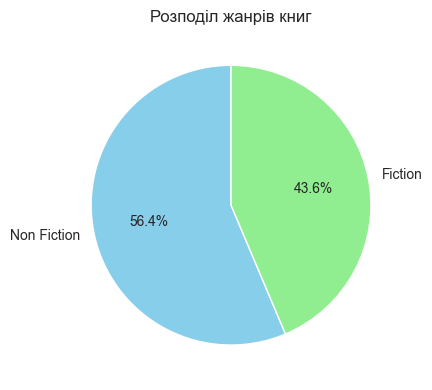

In [52]:
plt.figure(figsize=(6, 4))
plt.pie(df['genre'].value_counts(), labels=df['genre'].unique(), colors=['skyblue', 'lightgreen'], autopct='%1.1f%%', startangle=90)
plt.title('Розподіл жанрів книг')
plt.tight_layout()
plt.show()

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

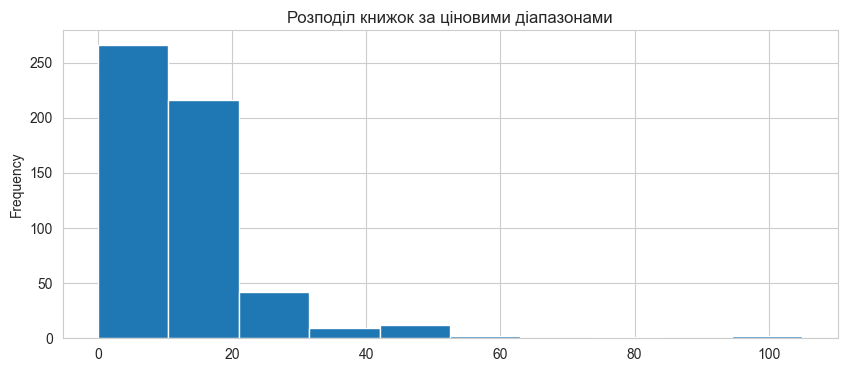

In [71]:
plt.title('Розподіл книжок за ціновими діапазонами')
df['price'].plot(kind='hist', figsize=(10, 4))
plt.show()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [54]:
print(f"Максимальна ціна: {df['price'].max()}")
print(f"Мінімальна ціна: {df['price'].min()}")
print(f"Середня ціна: {df['price'].mean()}")
print(f"Медіанна ціна: {df['price'].median()}")

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


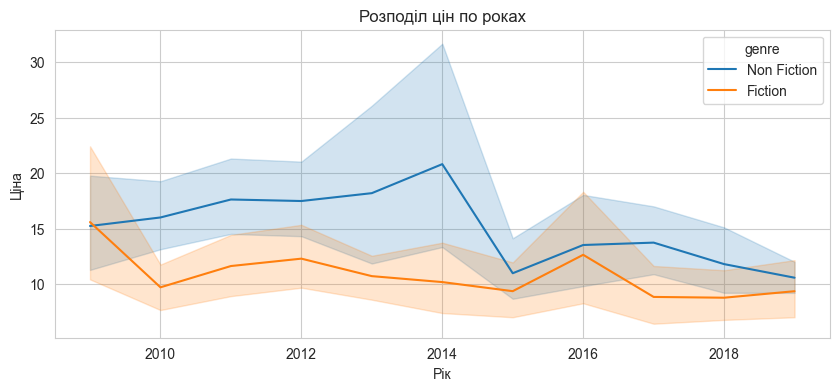

In [55]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,4))
sns.lineplot(data=df, x='year', y='price', hue='genre')
plt.xlabel('Рік')
plt.ylabel('Ціна')
plt.title('Розподіл цін по роках')
plt.show()

Пошук та сортування даних

Який рейтинг у датасеті найвищий? Відповідь: 4.9

In [56]:
df['user_rating'].max()

4.9

Скільки книг мають такий рейтинг? Відповідь: 52

In [57]:
sum(df['user_rating'] == df['user_rating'].max())

52

Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing

In [58]:
df[df['reviews'] == df['reviews'].max()]

,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: Publication Manual of the American Psychological Association, 6th Edition	

In [59]:
df[(df['year'] == 2015)].sort_values('price', ascending=False).head(1)

,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 20

In [60]:
sum((df['genre'] == 'Fiction') & (df['year'] == 2010))

20

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1

In [61]:
sum((df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011])))

1

І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values). Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)

In [62]:
df[(df['year'] == 2015) & (df['price'] < 8)].sort_values('price').tail(1)

,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


Агрегування даних та з'єднання таблиць

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [63]:
df.groupby('genre').agg({'price': ['min', 'max']})

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

Максимальна ціна для жанру Fiction? Відповідь: 82

Мінімальна ціна для жанру Fiction? Відповідь: 0

Максимальна ціна для жанру Non Fiction? Відповідь: 105

Мінімальна ціна для жанру Non Fiction? Відповідь: 0

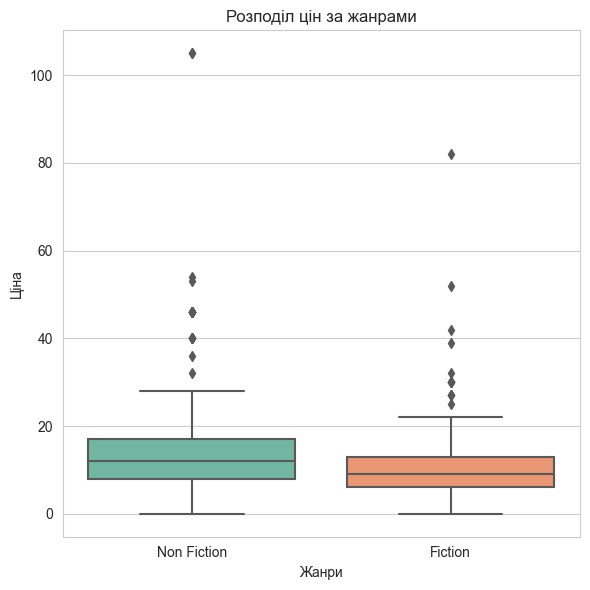

In [72]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='genre', y='price', data=df, palette='Set2')
plt.xlabel('Жанри')
plt.ylabel('Ціна')
plt.title('Розподіл цін за жанрами')
plt.tight_layout()
plt.show()

Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [65]:
authors_df = df.groupby('author').agg({'name': 'count'})
authors_df

,name
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


Якої розмірності вийшла таблиця? Відповідь: 248 rows, 1 column

In [66]:
authors_df.shape

(248, 1)

Який автор має найбільше книг? Відповідь: Jeff Kinney

In [67]:
authors_df.sort_values('name')

,name
author,
Jill Twiss,1
Patrick Thorpe,1
Ian K. Smith M.D.,1
Howard Stern,1
Hopscotch Girls,1
...,...
American Psychological Association,10
Suzanne Collins,11
Gary Chapman,11


Скільки книг цього автора? Відповідь: 12

Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [68]:
ratings_df = df.groupby('author').agg({'user_rating': 'mean'})
ratings_df.sort_values('user_rating')

,user_rating
author,
Donna Tartt,3.9
Gillian Flynn,4.0
Muriel Barbery,4.0
Gallup,4.0
Ian K. Smith M.D.,4.1
...,...
Lin-Manuel Miranda,4.9
Patrick Thorpe,4.9
Nathan W. Pyle,4.9


У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt

Який у цього автора середній рейтинг? Відповідь: 3.9

З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [69]:
authors_ratings_df = pd.concat([authors_df, ratings_df], axis=1)
authors_ratings_df

,name,user_rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [70]:
authors_ratings_df.sort_values(['name', 'user_rating'])

,name,user_rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


Який автор перший у списку? Відповідь: Muriel Barbery